<a href="https://colab.research.google.com/github/bflatts/UCDPA_BrianFlaherty/blob/main/BrianFlaherty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Assignment

## GitHub:
https://github.com/bflatts/UCDPA_BrianFlaherty.git

## Abstract:
The application is intended to identify table names and subsequent  data from the tables from an Autodesk Plant 3D catalogue file. (i.e. a .pcat file.). Once the user has chosen a file the application will then identify the table names from within and will print them to a CSV file located in the CVS directory. As the data contained within these pcat files isn't interesting, I also imported data from Kaggle. <br>

## Introduction:
The pcat files are SQLite files used as engineering catalogues for the creation of 3D design & construction models.<br>
The files effectively contain a library of engineering parts, e.g., valves, dampers, fittings, piping, etc. This project was chosen as a first step in creating an application that can extract combinations of information from these catalogues and hopefully allow quick manipulation of the information within.<br>
Each catalogue is intended to be a mirror of a real-world manufacturer's catalogue. <br> 
Construction engineers use information within the catalogues (pcat files) to facilitate cost saving exercises such as offsite manufacturing and purchasing negotiations. Having a quick way of accessing the data from these files will save countless hours for the companies working with this application.<br>
The content of these files is very boring and the information that can be gathered is limited. Due to this limitation I opted to introduce a data source from the internet.<br>
The data chosen was the NASA exoplanet data, the source url can be found below (in Datasets).<br>
The NASA Exoplanet dataset was chosen because everything to do with space is awesome.<br>
The csv file contains information on all known exoplanets (planets outside our solar system) discovered by NASA's various space missions, ground-based observatories, and other sources. The dataset includes information such as the planet's name, mass, radius, distance from its host star, orbital period, and other physical characteristics. The dataset also includes information on the host star, such as its name, mass, and radius.<br>


## Datasets
The datasets chosen for the project are:<br>
'sample.pcat' - A work related source.<br>
Is a SQLite file used with a 3D modelling package called Autodesk Plant 3D <br>
and<br>
'NASA Exoplanets' - Sourced online from Kaggle <br>
'https://www.kaggle.com/datasets/arashnic/exoplanets'.<br>


## Implementation Process: (Sample.pcat)

### Imports:
The libraries used for this project were pandas, sqlite3, numpy, and matplotlib.<br> 
Panadas for capturing the output as a data frame and pushing that to a csv file.<br>
Sqlite3 for accessing the pcat files. (pcats are SQLite files)<br>
matplotlib for visualizing the data and plotting results.<br>

In [53]:
# Imports
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

### Custom Database class:
This is a custom class. I hope to use this database connector class again with my next steps for this project.<br> 

In [2]:
# Custom Database class [1, carusot42]

class Database:
    """Custom class to connect to SQLite"""
    def __init__(self, name):
        self._conn = sqlite3.connect(name)
        self._cursor = self._conn.cursor()

    def __enter__(self):
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        self.close()

    @property
    def connection(self):
        return self._conn

    @property
    def cursor(self):
        return self._cursor

    def commit(self):
        self.connection.commit()

    def close(self, commit=True):
        if commit:
            self.commit()
        self.connection.close()

    def execute(self, sql, params=None):
        self.cursor.execute(sql, params or ())

    def fetchall(self):
        return self.cursor.fetchall()

    def fetchone(self):
        return self.cursor.fetchone()

    def query(self, sql, params=None):
        self.cursor.execute(sql, params or ())
        return self.fetchall()

### Variables:
Variables that needed to be created for the different operations thoughtout the project.<br>
I hope to automate some of these in the future allowing the user some flexibility using tkinter.<br> 

In [3]:
#Varibles

# Create empty list to store table names
table_names =  []

# Create list to hold Column name(s)
columns=['Table Names']

# Fixed variables, path , subpath, and output
#PATH = "C:\\Users\\bflat\\P3D_Automation\\"
SUBPATH = "/content/drive/MyDrive/Colab Notebooks/CSV/"
OUTPUT = "TableNames.csv" 

# filename
filename = "sample.pcat"
nasaFilename = "cleaned_5250.csv"

# Write a query and execute it with cursor
query = """
SELECT name FROM sqlite_master
WHERE type='table'
"""

### Convert Tuple:
Fucntion that converts tuples to strings<br>

In [4]:
def convertTuple(tup):
    """Function convert Tuples to strings"""
    str = ''   # initialize an empty string
    for item in tup:
        str = str + item
    return str

### Connect to DB:
Connect to my SQLite file using custom class.<br>
Getting the data, saving it to variable as a string.<br>
Originally, I had this a straight simple code, but rewrote to include the custom class.<br>
As mentioned, I intend to reuse this class and code. <br>

In [5]:
# Connect to DB
try:
    # Connect to DB and create a cursor

    with Database(filename) as db:
        db.execute(query)

        print("..Collecting Data..")
 
        result = db.fetchall()
        for row in result:
            name = convertTuple(row)
            table_names.append(name)
            #print(name)
        
        print("..Data Collected..")

# Handle errors
except sqlite3.Error as error:
    print('Error occured - ', error)

   

..Collecting Data..
..Data Collected..


### Pandas Dataframe:
Create the Pandas Dataframe.<br>

In [6]:
# Pandas Dataframe
df = pd.DataFrame(data=table_names, columns=columns)
#print(df)

### Mount Google Drive:
Mount google drive to write csv file.<br>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Write to CSV:
Write Pandas Dataframe to CSV.<br>

In [8]:
# Write DataFrame to Excel file
df.to_csv(SUBPATH+OUTPUT,index=False)


## Implementation Process: (NASA Exoplantes)
From here we read in the exoplanets data, this is due to the boring nature of the original SQLite data from Autodesks application 'Pland 3D'<br>

### Read CSV:
Read csv file to Pandas Dataframe.<br>

In [9]:
# Reading file
nasa_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/"+nasaFilename, header = 0)

### Sorting:
Sorts dataset by distance, and prints out the first 5 names.<br>

In [10]:
# Sorting
number_to_print = 5

print(f'The furtheset {number_to_print} exoplanets from the sun are:')          #Prints a note
farthest_from_sun = nasa_df.sort_values('distance', ascending=False )           #sorts the dataset by distance
print(farthest_from_sun[['name']].head(number_to_print).to_string(index=False)) #prints out the first number of names



The furtheset 5 exoplanets from the sun are:
                 name
           SWEEPS-4 b
          SWEEPS-11 b
 KMT-2021-BLG-1077L b
 KMT-2021-BLG-1077L c
OGLE-2015-BLG-0051L b


### Indexing:
Set the 'name' column as the dataset index, and print the 'distance' and 'planet_type' columns noting the name is now the index.<br>

In [11]:
# Indexing
nasa_df_ind = nasa_df.set_index('name')                                         #Set the name column as the dataset index
print(nasa_df_ind[['distance','planet_type']].head())                           #print the distance and planet_type, noting the index is now name

                      distance planet_type
name                                      
11 Comae Berenices b     304.0   Gas Giant
11 Ursae Minoris b       409.0   Gas Giant
14 Andromedae b          246.0   Gas Giant
14 Herculis b             58.0   Gas Giant
16 Cygni B b              69.0   Gas Giant


### Grouping:
Group the data by 'planet_type' and aggregate the min, max and mean for the radius multiplier.<br>

In [12]:
# Grouping
print('Table showing smallest, largest, and avergage planet size per planet type')#Prints a note
nasa_df.groupby('planet_type')['radius_multiplier'].agg(['min', 'max', 'mean'])    #Group the data by planet_type and aggregate the min, max and mean for the radius multiplier

Table showing smallest, largest, and avergage planet size per planet type


,min,max,mean
planet_type,,,
Gas Giant,0.225,6.900,1.160728
Neptune-like,0.200,2.233,0.493737
Super Earth,0.201,2.230,1.487342
Terrestrial,0.259,1.800,0.824062
Unknown,NaN,NaN,NaN


### Duplication and missing values check:
We carry out this exercies to show our dataset doesnt have any duplication nor does it have any missing values.<br>

In [13]:
# Checking for duplication and missing values
missing = nasa_df[['name']].isnull().sum().to_string(index=False)               # counts the cells in name that are null, and converts them to string
duplicate = len(nasa_df['name'])-len(nasa_df['name'].drop_duplicates())         # counts the duplicates in name column

# Print message
print('there are: ' + missing + ' missing names' )                              #Prints a note with results
print('there are: ' + str(duplicate) + ' duplicated names' )                    #Prints a note with results



there are: 0 missing names
there are: 0 duplicated names


### Splitting/Joining data:
Initially we slit the data, before 2000 and after 1999.<br>
This gives us two dataset, if we merge the datasets and view the shape of the new dataset we can set the merge worked but gives us 25 columns. However, if we concatenate teh dataset we see we are left with the same shape dataset as the original.

In [14]:
# Split data (all entries discovered before 2000)
data_before_2000 = nasa_df[nasa_df['discovery_year'] < 2000]

# Split data (all entries discovered after 1999)
data_after_1999 = nasa_df[nasa_df['discovery_year'] > 1999]

print(str(data_before_2000.shape)+'   <- before 2000')
print(str(data_after_1999.shape)+' <- after 1999')
print(str(nasa_df.shape)+ ' <- original')

# Merge the split parts
data_merge = data_after_1999.merge(data_before_2000, on='name', how='left', suffixes=('_aft99', '_bfr2000'))

print(str(data_merge.shape)+' <- merged')

# Concatenate the split parts
data_concat = pd.concat([data_before_2000,data_after_1999])
print(str(data_concat.shape)+' <- concatenated')

(30, 13)   <- before 2000
(5220, 13) <- after 1999
(5250, 13) <- original
(5220, 25) <- merged
(5250, 13) <- concatenated


### Counting:
Here we cound the planets discovered each year.<br>
Noting the crazy amount of planets discovered in 2016. What happened in 2016 to cause this huge spike?<br>

In [15]:
# Count planets discovered each year
nasa_df['discovery_year'].value_counts()

2016    1517
2014     875
2021     525
2022     338
2018     326
2020     234
2019     203
2015     157
2017     153
2012     138
2011     138
2013     126
2010      97
2009      94
2008      65
2007      52
2005      36
2006      31
2002      29
2004      27
2003      22
2000      16
1999      13
2001      12
2023       9
1996       6
1998       6
1992       2
1995       1
1994       1
1997       1
Name: discovery_year, dtype: int64

### Plot 1: (2016 spike)
This plot shows the spike on a bar chart<br>

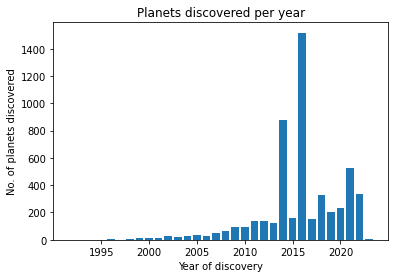

In [71]:
# Plot the above info
#(Plot: Count of planets discovered each year)
count_discovered = nasa_df['discovery_year'].value_counts()
count_discovered_df = pd.DataFrame(count_discovered)
plt.bar(count_discovered_df.index, count_discovered_df["discovery_year"])
plt.xlabel("Year of discovery")
plt.ylabel("No. of planets discovered")
plt.title('Planets discovered per year')
plt.show()

In [72]:
# As 2016 has substantially more planets discovered, lets check it out
discovered2016 = nasa_df['discovery_year'] == 2016
nasa_df['detection_method'][discovered2016].value_counts()

Transit                        1453
Radial Velocity                  50
Gravitational Microlensing       10
Direct Imaging                    2
Transit Timing Variations         1
Pulsation Timing Variations       1
Name: detection_method, dtype: int64

### Plot 2: (Transit spike in 2016)
This plot shows the spike on a bar chart<br>

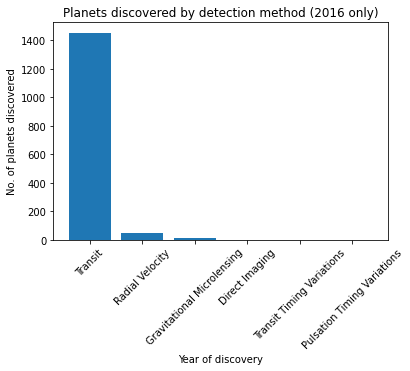

In [78]:
# Plot the above info
#(Plot: Planets discovered by detection method (2016 only))
count_detect = nasa_df['detection_method'][discovered2016].value_counts()
count_detect_df = pd.DataFrame(count_detect)
plt.bar(count_detect_df.index, count_detect_df["detection_method"])
plt.xlabel("Year of discovery")
plt.ylabel("No. of planets discovered")
plt.title('Planets discovered by detection method (2016 only)')
plt.xticks(rotation=45)
plt.show()

### Plot 3: (Detection Method Plot)
This plot shows the spike on a bar chart<br>

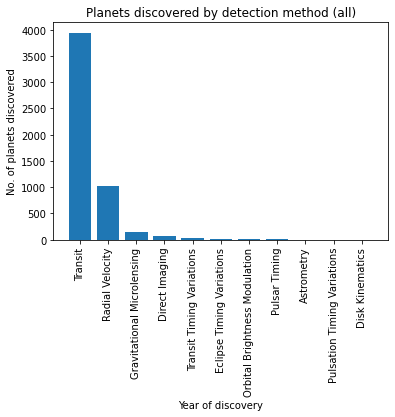

In [81]:
# Plot the above info
#(Plot: Count of Planets discovered by detection method (all))
count_detect_all = nasa_df['detection_method'].value_counts()
count_detect_all_df = pd.DataFrame(count_detect_all)
plt.bar(count_detect_all_df.index, count_detect_all_df["detection_method"])
plt.xlabel("Year of discovery")
plt.ylabel("No. of planets discovered")
plt.title('Planets discovered by detection method (all)')
plt.xticks(rotation=90)
plt.show()

In [83]:
# Lets check if any planets are a) terrestrial (i.e, made of rock), b.1) have a comparable mass to earth and within a 10% range i.e. 0.9 or 1.1
# They might be still very hot or very cold but we dont have enough information to include possible temperature parameters within this dataset.
data_query = nasa_df.query('(mass_wrt == "Earth" and planet_type == "Terrestrial" and mass_multiplier >= 0.9 and mass_multiplier <= 1.1)')
print(data_query[['name','distance']].sort_values('distance').set_index('name'))


                      distance
name                          
K2-239 c                 101.0
K2-136 b                 193.0
EPIC 206215704 b         358.0
Kepler-1053 b            493.0
Kepler-220 d             558.0
EPIC 201833600 c         840.0
Kepler-1876 b            848.0
Kepler-381 b             872.0
K2-157 b                 973.0
K2-411 b                 973.0
Kepler-1800 b           1143.0
Kepler-969 c            1273.0
EPIC 220492298 b        2037.0
Kepler-392 b            2223.0
KMT-2020-BLG-0414L b    2610.0
Kepler-1328 b           2654.0
Kepler-1047 c           2667.0
Kepler-1417 b           3235.0
Kepler-1464 c           3757.0


## Insites:

Insights from NASA data only:


1.   2016 is the greatest year for planet discovery.
2.   The 'Transit' detection system is the superior (or most prefered) method of detection. 
3.   SWEEPS 4 b & 11 b are two exoplanets discovred in 2006, are currently the furthest known exoplanets from earth at 27,727 light years away
4.   Planets that may be habitable based on my crude assumption about comparisons with Earth are the planets from the K2-239c and K2-136b. Both planets are rouchly the same size as earth and are about the same distance away from their sun.
5.   In 2016, t



## References:

1. https://stackoverflow.com/questions/38076220/python-mysqldb-connection-in-a-class, carusot42, 2023

2. https://www.kaggle.com/datasets/arashnic/exoplanets, 2023